In [1]:
%load_ext autoreload
%autoreload 2

In [160]:
import sys
from pathlib import Path
from time import time
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
ROOT_PATH = Path().absolute().parent.parent
if str(ROOT_PATH) not in sys.path:
    sys.path.insert(1, str(ROOT_PATH))
from frequency_response import FrequencyResponse
from peq import PEQ, HighShelf, LowShelf, Peaking

In [223]:
def plot_peq(peq, fr):
    fig, ax = fr.plot_graph(raw=False, smoothed=False, error=False, error_smoothed=False, target=False, equalized=False, parametric_eq=False, fixed_band_eq=False, show=False)
    peq.plot(fig=fig, ax=ax)
    plt.show()

## Testing Initialization

RMSE (f < 10 kHz): 0.38 dB


|   # | Type      |   Fc (Hz) |    Q |   Gain (dB) |
|-----|-----------|-----------|------|-------------|
|   0 | LowShelf  |       146 | 0.7  |        -2.9 |
|   1 | Peaking   |       201 | 0.31 |        -2   |
|   2 | Peaking   |       355 | 1.86 |         0.5 |
|   3 | Peaking   |      1243 | 1.93 |        -0.5 |
|   4 | Peaking   |      2148 | 1.95 |        -2.1 |
|   5 | Peaking   |      2701 | 5.48 |         0.8 |
|   6 | Peaking   |      2924 | 2.13 |         5.5 |
|   7 | Peaking   |      3604 | 4.89 |         2.5 |
|   8 | Peaking   |      4810 | 5.86 |        -2.8 |
|   9 | Peaking   |      6046 | 7.6  |         2.6 |
|  10 | Peaking   |      9002 | 0.99 |         8   |
|  11 | HighShelf |      8000 | 0.7  |        -8.9 |

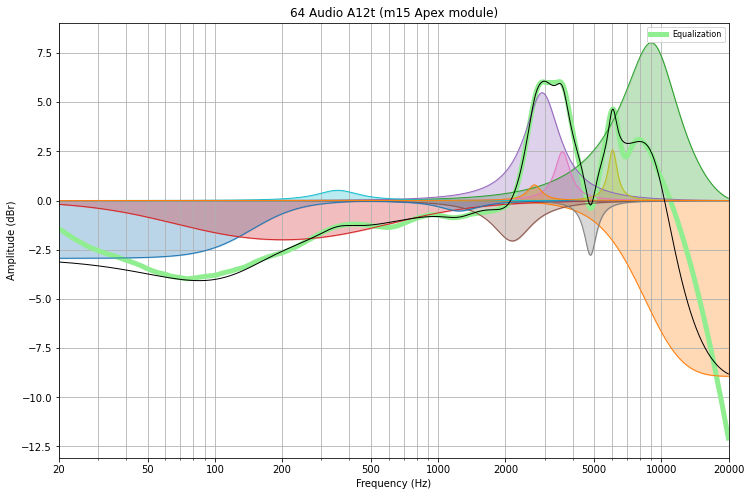

In [234]:
fr = FrequencyResponse.read_from_csv('../../results/oratory1990/harman_in-ear_2019v2/64 Audio A12t (m15 Apex module)/64 Audio A12t (m15 Apex module).csv')
f = fr.frequency.copy()
fs = 44.1e3
peq = PEQ.from_dict(44.1e3, {
    'filters': [{'type': 'LOW_SHELF'}, {'type': 'HIGH_SHELF', 'fc': 8000}] + [{'type': 'PEAKING'}] * 10,
}, target=fr.equalization)
init = peq._init_optimizer_params()
ix_10k = np.sum(peq.f < 10000)
print(f'RMSE (f < 10 kHz): {np.sqrt(np.mean(np.square(fr.equalization[:ix_10k] - peq.fr[:ix_10k]))):.2f} dB')
display(Markdown(peq.markdown_table()))
plot_peq(peq, fr)

## Testing Optimization

RMSE (f < 10 kHz): 0.85 dB


|   # | Type     |   Fc (Hz) |    Q |   Gain (dB) |
|-----|----------|-----------|------|-------------|
|   0 | LowShelf |       105 | 0.7  |        -0.5 |
|   1 | Peaking  |        89 | 0.33 |        -3.5 |
|   2 | Peaking  |      1839 | 0.73 |        -1.7 |
|   3 | Peaking  |      2838 | 4.33 |         2.9 |
|   4 | Peaking  |      3340 | 1.45 |         5.6 |

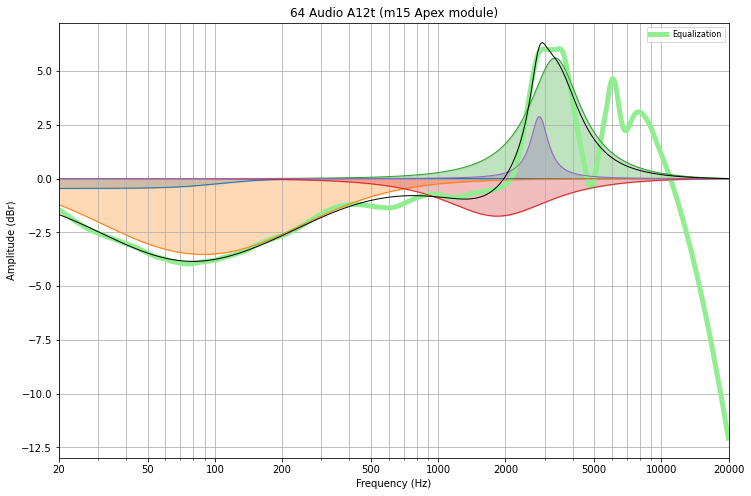

In [238]:
fr = FrequencyResponse.read_from_csv('../../results/oratory1990/harman_in-ear_2019v2/64 Audio A12t (m15 Apex module)/64 Audio A12t (m15 Apex module).csv')

configs = [{
    'filters': [{
        'type': 'LOW_SHELF',
        'fc': 105,
        'q': 0.7
    }] + [{'type': 'PEAKING'}] * 4
},
{
    'filters': [{'fc': 105, 'q': 0.7, 'type': 'LOW_SHELF'}, {'fc': 10000, 'q': 0.7, 'type': 'HIGH_SHELF'}] +
    #'filters': [{'type': 'LOW_SHELF'}, {'type': 'HIGH_SHELF'}] +
        [{'type': 'PEAKING', 'max_fc': 10e3}] * 3,
}]

peq = PEQ.from_dict(44.1e3, configs[0], target=fr.equalization)
peq.optimize()

ix_10k = np.sum(peq.f < 10000)
print(f'RMSE (f < 10 kHz): {np.sqrt(np.mean(np.square(fr.equalization[:ix_10k] - peq.fr[:ix_10k]))):.2f} dB')
display(Markdown(peq.markdown_table()))

plot_peq(peq, fr)

In [191]:
np.concatenate([
    np.array([[1,2,3], [4,5,6]]),
    np.array([[7,8,9], [10,11,12]])
], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

0.9999917006989705


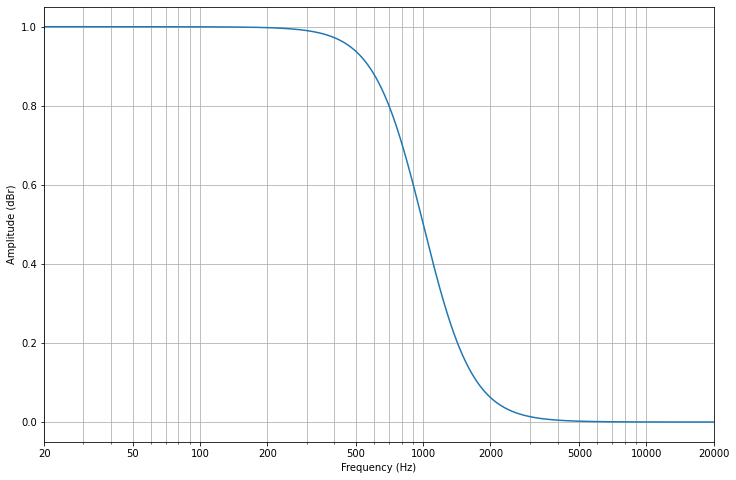

In [207]:
f = FrequencyResponse.generate_frequencies()
fs = 44.1e3
filt = LowShelf(f, fs, fc=1000, q=0.7, gain=1)
fig, ax = FrequencyResponse.init_plot()
ax.plot(f, filt.fr)
print(np.max(filt.fr))
plt.show()